In [43]:
include("../../MCVI_Julia/src/Planner.jl")
using Plots
using Profile, FlameGraphs, ProfileSVG
using RockSample
using BenchmarkTools

## 1. First prepare the POMDP and some basic parameters

In [2]:
pomdp = RockSamplePOMDP(7,8)

action_space = actions(pomdp)
obs_space = observations(pomdp)

nb_particles_b0 = 500
max_node_size = 10000

b0 = initialstate(pomdp)
b0_particles = []
for i in 1:nb_particles_b0
    push!(b0_particles, rand(b0))
end

## 2. Prepare $V_{mdp}$ heuristic

In [3]:
# define Q learning
Q_table = Dict{Any, Dict{Int64, Float64}}()
learning_rate = 0.9
explore_rate = 0.65
nb_particles_b0 = 10000

b0_particles = []
for i in 1:nb_particles_b0
    push!(b0_particles, rand(b0))
end
Q_learning_policy = Qlearning(Q_table, learning_rate, explore_rate, action_space)
RL = FindRLower(pomdp, b0, action_space)

nb_episode_size = 5
nb_max_episode = 5
nb_sim = 20
epsilon_Q_learning = 0.01
Training(Q_learning_policy, nb_episode_size, nb_max_episode, nb_sim, epsilon_Q_learning, b0_particles, pomdp)

------ Episode: 0 ------
Avg Value: 28.481584098812966
------ Episode: 1 ------
Avg Value: 30.132518553480434
------ Episode: 2 ------
Avg Value: 30.166339533141457
------ Episode: 3 ------
Avg Value: 30.18685443009976
------ Episode: 4 ------
Avg Value: 30.20954371148016


## 3. Create initial FSC and belief Tree Node

In [4]:
a, U = EvaluateUpperBound(b0_particles, Q_learning_policy)
root_b_tree_node = BeliefTreeNode(b0_particles, Dict{Pair{Any, Any}, BeliefTreeNode}(), a, Dict{Any, Float64}(),Dict{Any, Dict{Any,Float64}}(),U, RL, -1)
fsc = InitFSC(max_node_size, action_space, obs_space)

FSC(Dict{Pair{Any, Any}, Int64}[Dict(), Dict(), Dict(), Dict(), Dict(), Dict(), Dict(), Dict(), Dict(), Dict()  …  Dict(), Dict(), Dict(), Dict(), Dict(), Dict(), Dict(), Dict(), Dict(), Dict()], FscNode[], 1:13, 1:3, 1)

## 4. MCVI planning

In [5]:
# @profview MCVIPlanning(b0_particles, fsc, pomdp, RL, 40, 500, 0.1, 5, Q_learning_policy, root_b_tree_node)
MCVIPlanning(b0_particles, fsc, pomdp, RL, 40, 1000, 0.1, 20, Q_learning_policy, root_b_tree_node)
fsc._start_node_index = root_b_tree_node._fsc_node_index

--- Iter 0 ---
Tr_root upper bound:28.699794479423755
Tr_root lower bound:0.0
Precision:28.699794479423755
Belief Expand Process takes 1.017068656 seconds
BackUp Process takes 24.357856319 seconds
--- Iter 1 ---
Tr_root upper bound:28.699794479423755
Tr_root lower bound:4.810325
Precision:23.889469479423756
Belief Expand Process takes 0.566118868 seconds
BackUp Process takes 98.474462201 seconds
--- Iter 2 ---
Tr_root upper bound:25.77613721496948
Tr_root lower bound:8.28463836900627
Precision:17.49149884596321
Belief Expand Process takes 0.619098045 seconds
BackUp Process takes 194.283785623 seconds
--- Iter 3 ---
Tr_root upper bound:25.77613721496948
Tr_root lower bound:12.164812689331592
Precision:13.611324525637889
Belief Expand Process takes 0.402976175 seconds


LoadError: InterruptException:

In [6]:
# g = flamegraph(C=true)
# img = flamepixels(g)

## 4. Evaluation

In [16]:
SimulationWithFSC(b0, pomdp, fsc, 20) # Simulate One Time

---------
step: 1
state:RSState{8}([1, 1], Bool[1, 0, 0, 0, 1, 0, 0, 0])
perform action:5
recieve obs:3
nI:1
nI value:0.0


LoadError: KeyError: key 5 => 3 not found

In [8]:
EvaluationWithSimulationFSC(b0, pomdp, fsc, discount(pomdp), 10000)

LoadError: KeyError: key 5 => 3 not found

In [9]:
EvaluationWithSimulationFSC(b0, pomdp, fsc, discount(pomdp), 1000, 50)

LoadError: MethodError: no method matching EvaluationWithSimulationFSC(::SparseCat{Vector{RSState{8}}, Vector{Float64}}, ::RockSamplePOMDP{8}, ::FSC, ::Float64, ::Int64, ::Int64)

[0mClosest candidates are:
[0m  EvaluationWithSimulationFSC(::Any, ::Any, ::FSC, ::Float64, ::Int64, ::Int64, [91m::Any[39m)
[0m[90m   @[39m [35mMain[39m [90m~/MCVI_Julia/src/[39m[90m[4mPlanner.jl:203[24m[39m
[0m  EvaluationWithSimulationFSC(::Any, ::Any, ::FSC, ::Float64, ::Int64)
[0m[90m   @[39m [35mMain[39m [90m~/MCVI_Julia/src/[39m[90m[4mPlanner.jl:177[24m[39m


In [10]:
fsc._nodes

122-element Vector{FscNode}:
 FscNode(Dict{Any, Float64}(5 => 0.0, 12 => 0.0, 8 => 0.0, 1 => 0.0, 6 => 0.0, 11 => 0.0, 9 => 0.0, 3 => 0.0, 7 => 0.0, 4 => 0.0…), Dict{Any, Float64}(5 => 0.0, 12 => 0.0, 8 => 0.0, 1 => 0.0, 6 => 0.0, 11 => 0.0, 9 => 0.0, 3 => 0.0, 7 => 0.0, 4 => 0.0…), Dict{Any, Dict{Any, Dict{Int64, Float64}}}(5 => Dict(2 => Dict(), 3 => Dict(), 1 => Dict()), 12 => Dict(2 => Dict(), 3 => Dict(), 1 => Dict()), 8 => Dict(2 => Dict(), 3 => Dict(), 1 => Dict()), 1 => Dict(2 => Dict(), 3 => Dict(), 1 => Dict()), 6 => Dict(2 => Dict(), 3 => Dict(), 1 => Dict()), 11 => Dict(2 => Dict(), 3 => Dict(), 1 => Dict()), 9 => Dict(2 => Dict(), 3 => Dict(), 1 => Dict()), 3 => Dict(2 => Dict(), 3 => Dict(), 1 => Dict()), 7 => Dict(2 => Dict(), 3 => Dict(), 1 => Dict()), 4 => Dict(2 => Dict(), 3 => Dict(), 1 => Dict())…), 0.0, 5)
 FscNode(Dict{Any, Float64}(5 => 0.0, 12 => 0.0, 8 => 0.0, 1 => -0.46, 6 => 0.0, 11 => 0.0, 9 => 0.0, 3 => 0.0, 7 => 0.0, 4 => 0.0…), Dict{Any, Float64}(5 => 0.0

In [11]:
fsc._eta

10000-element Vector{Dict{Pair{Any, Any}, Int64}}:
 Dict()
 Dict((2 => 3) => 1, (12 => 3) => 1, (3 => 3) => 1, (9 => 1) => 1, (1 => 2) => 1, (4 => 3) => 1, (7 => 2) => 1, (13 => 3) => 1, (5 => 1) => 1, (11 => 1) => 1…)
 Dict((2 => 3) => 1, (12 => 3) => 1, (3 => 3) => 1, (9 => 1) => 1, (1 => 2) => 1, (4 => 3) => 1, (7 => 2) => 1, (13 => 3) => 1, (5 => 1) => 1, (11 => 1) => 1…)
 Dict((2 => 3) => 1, (12 => 3) => 1, (3 => 3) => 1, (9 => 1) => 1, (1 => 2) => 1, (4 => 3) => 1, (7 => 2) => 1, (13 => 3) => 1, (5 => 1) => 1, (11 => 1) => 1…)
 Dict((2 => 3) => 1, (12 => 3) => 1, (3 => 3) => 1, (9 => 1) => 1, (1 => 2) => 1, (4 => 3) => 1, (7 => 2) => 1, (13 => 3) => 1, (5 => 1) => 1, (11 => 1) => 1…)
 Dict((2 => 3) => 1, (12 => 3) => 1, (3 => 3) => 1, (9 => 1) => 1, (1 => 2) => 1, (4 => 3) => 1, (7 => 2) => 1, (13 => 3) => 1, (5 => 1) => 1, (11 => 1) => 1…)
 Dict((2 => 3) => 1, (12 => 3) => 1, (3 => 3) => 1, (9 => 1) => 1, (1 => 2) => 1, (4 => 3) => 1, (7 => 2) => 1, (13 => 3) => 1, (5 => 1) => 1

In [12]:
root_b_tree_node

BeliefTreeNode(Any[RSState{8}([1, 1], Bool[1, 0, 0, 1, 0, 0, 1, 0]), RSState{8}([1, 1], Bool[1, 1, 0, 0, 1, 1, 1, 0]), RSState{8}([1, 1], Bool[0, 0, 0, 0, 1, 0, 1, 1]), RSState{8}([1, 1], Bool[1, 0, 0, 0, 0, 1, 1, 1]), RSState{8}([1, 1], Bool[1, 0, 1, 1, 1, 1, 0, 1]), RSState{8}([1, 1], Bool[0, 0, 0, 1, 0, 0, 1, 0]), RSState{8}([1, 1], Bool[1, 1, 1, 1, 1, 1, 1, 1]), RSState{8}([1, 1], Bool[1, 1, 1, 0, 1, 0, 0, 0]), RSState{8}([1, 1], Bool[0, 1, 1, 1, 1, 1, 1, 0]), RSState{8}([1, 1], Bool[1, 1, 1, 1, 1, 0, 1, 1])  …  RSState{8}([1, 1], Bool[0, 1, 0, 1, 1, 1, 1, 1]), RSState{8}([1, 1], Bool[1, 1, 0, 1, 1, 1, 0, 0]), RSState{8}([1, 1], Bool[1, 1, 1, 1, 1, 1, 0, 0]), RSState{8}([1, 1], Bool[1, 0, 1, 0, 1, 0, 0, 0]), RSState{8}([1, 1], Bool[1, 0, 0, 1, 0, 1, 1, 1]), RSState{8}([1, 1], Bool[1, 0, 1, 1, 0, 0, 1, 1]), RSState{8}([1, 1], Bool[1, 1, 1, 0, 1, 0, 1, 0]), RSState{8}([1, 1], Bool[0, 0, 0, 1, 0, 1, 0, 0]), RSState{8}([1, 1], Bool[1, 0, 1, 1, 0, 1, 1, 1]), RSState{8}([1, 1], Bool[0, 1

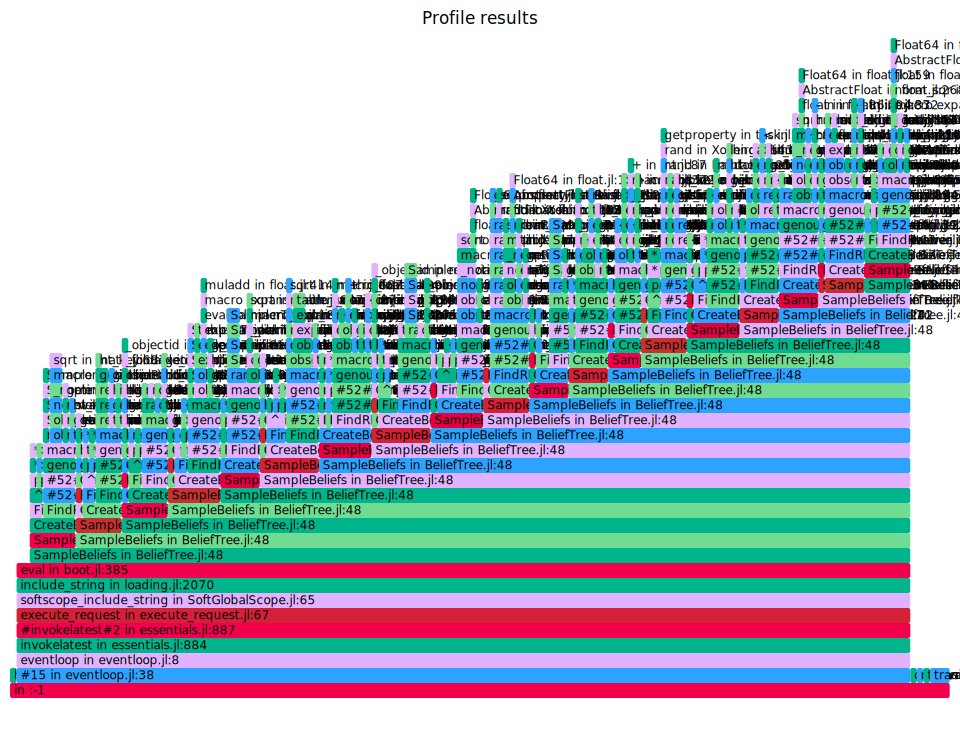

In [13]:
belief_tree_node_list = []
@profview SampleBeliefs(root_b_tree_node, rand(b0), 0, 20, 300, pomdp, Q_learning_policy, belief_tree_node_list)

In [14]:
belief_tree_node_list = []
time_taken = @elapsed SampleBeliefs(root_b_tree_node, rand(b0), 0, 40, 1000, pomdp, Q_learning_policy, belief_tree_node_list)

0.018312876

In [15]:
println("Execution time: $time_taken seconds")

Execution time: 0.018312876 seconds


In [44]:
fsc_node_list = Vector{Int64}()

GetFscNodeList(root_b_tree_node, fsc_node_list)

edge first: 8
best a: 6
false
edge first: 12
best a: 6
false
edge first: 6
best a: 6
true
edge first: 12
best a: 6
false
edge first: 8
best a: 6
false
edge first: 6
best a: 6
true


In [45]:
fsc_node_list

1-element Vector{Int64}:
 121

In [47]:
fsc._eta[121]

Dict{Pair{Any, Any}, Int64} with 39 entries:
  2=>3  => 35
  12=>3 => 1
  3=>3  => 117
  9=>1  => 120
  1=>2  => 1
  4=>3  => 120
  7=>2  => 120
  13=>3 => 1
  5=>1  => 1
  11=>1 => 120
  8=>2  => 120
  10=>2 => 120
  2=>2  => 1
  6=>1  => 119
  9=>3  => 1
  12=>2 => 120
  3=>2  => 1
  5=>3  => 120
  4=>2  => 1
  11=>3 => 1
  13=>2 => 120
  1=>1  => 1
  7=>1  => 120
  6=>3  => 1
  8=>1  => 71
  ⋮     => ⋮

In [32]:
pair_a = Pair(1, 2)

1 => 2

In [33]:
pair_a.first

1